In [1]:
%matplotlib inline
import torch
from torch.distributions import multinomial

In [2]:
fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 0., 0., 0., 1., 0.])

In [3]:
multinomial.Multinomial(10, fair_probs).sample()

tensor([1., 3., 3., 0., 1., 2.])

In [4]:
# 将结果存储为32位浮点数以进行除法
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000  # 相对频率作为估计值

tensor([0.1540, 0.1800, 0.1800, 0.1630, 0.1550, 0.1680])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10424\1426759653.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


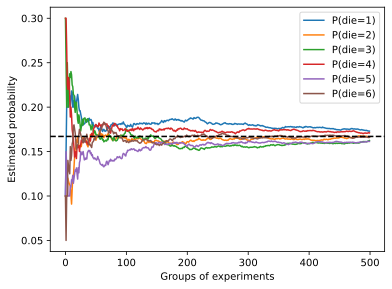

In [9]:
import matplotlib.pyplot as plt
from IPython import display

def use_svg_display():  #@save
    """使用svg格式在Jupyter中显示绘图"""
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):  #@save
    """设置matplotlib的图表大小"""
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize
    
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

set_figsize((6, 4.5))
for i in range(6):
    plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
plt.axhline(y=0.167, color='black', linestyle='dashed')
plt.gca().set_xlabel('Groups of experiments')
plt.gca().set_ylabel('Estimated probability')
plt.legend();